# **IBM EMPLOYEE ATTRITION ANALYSIS AND PREDICTION**

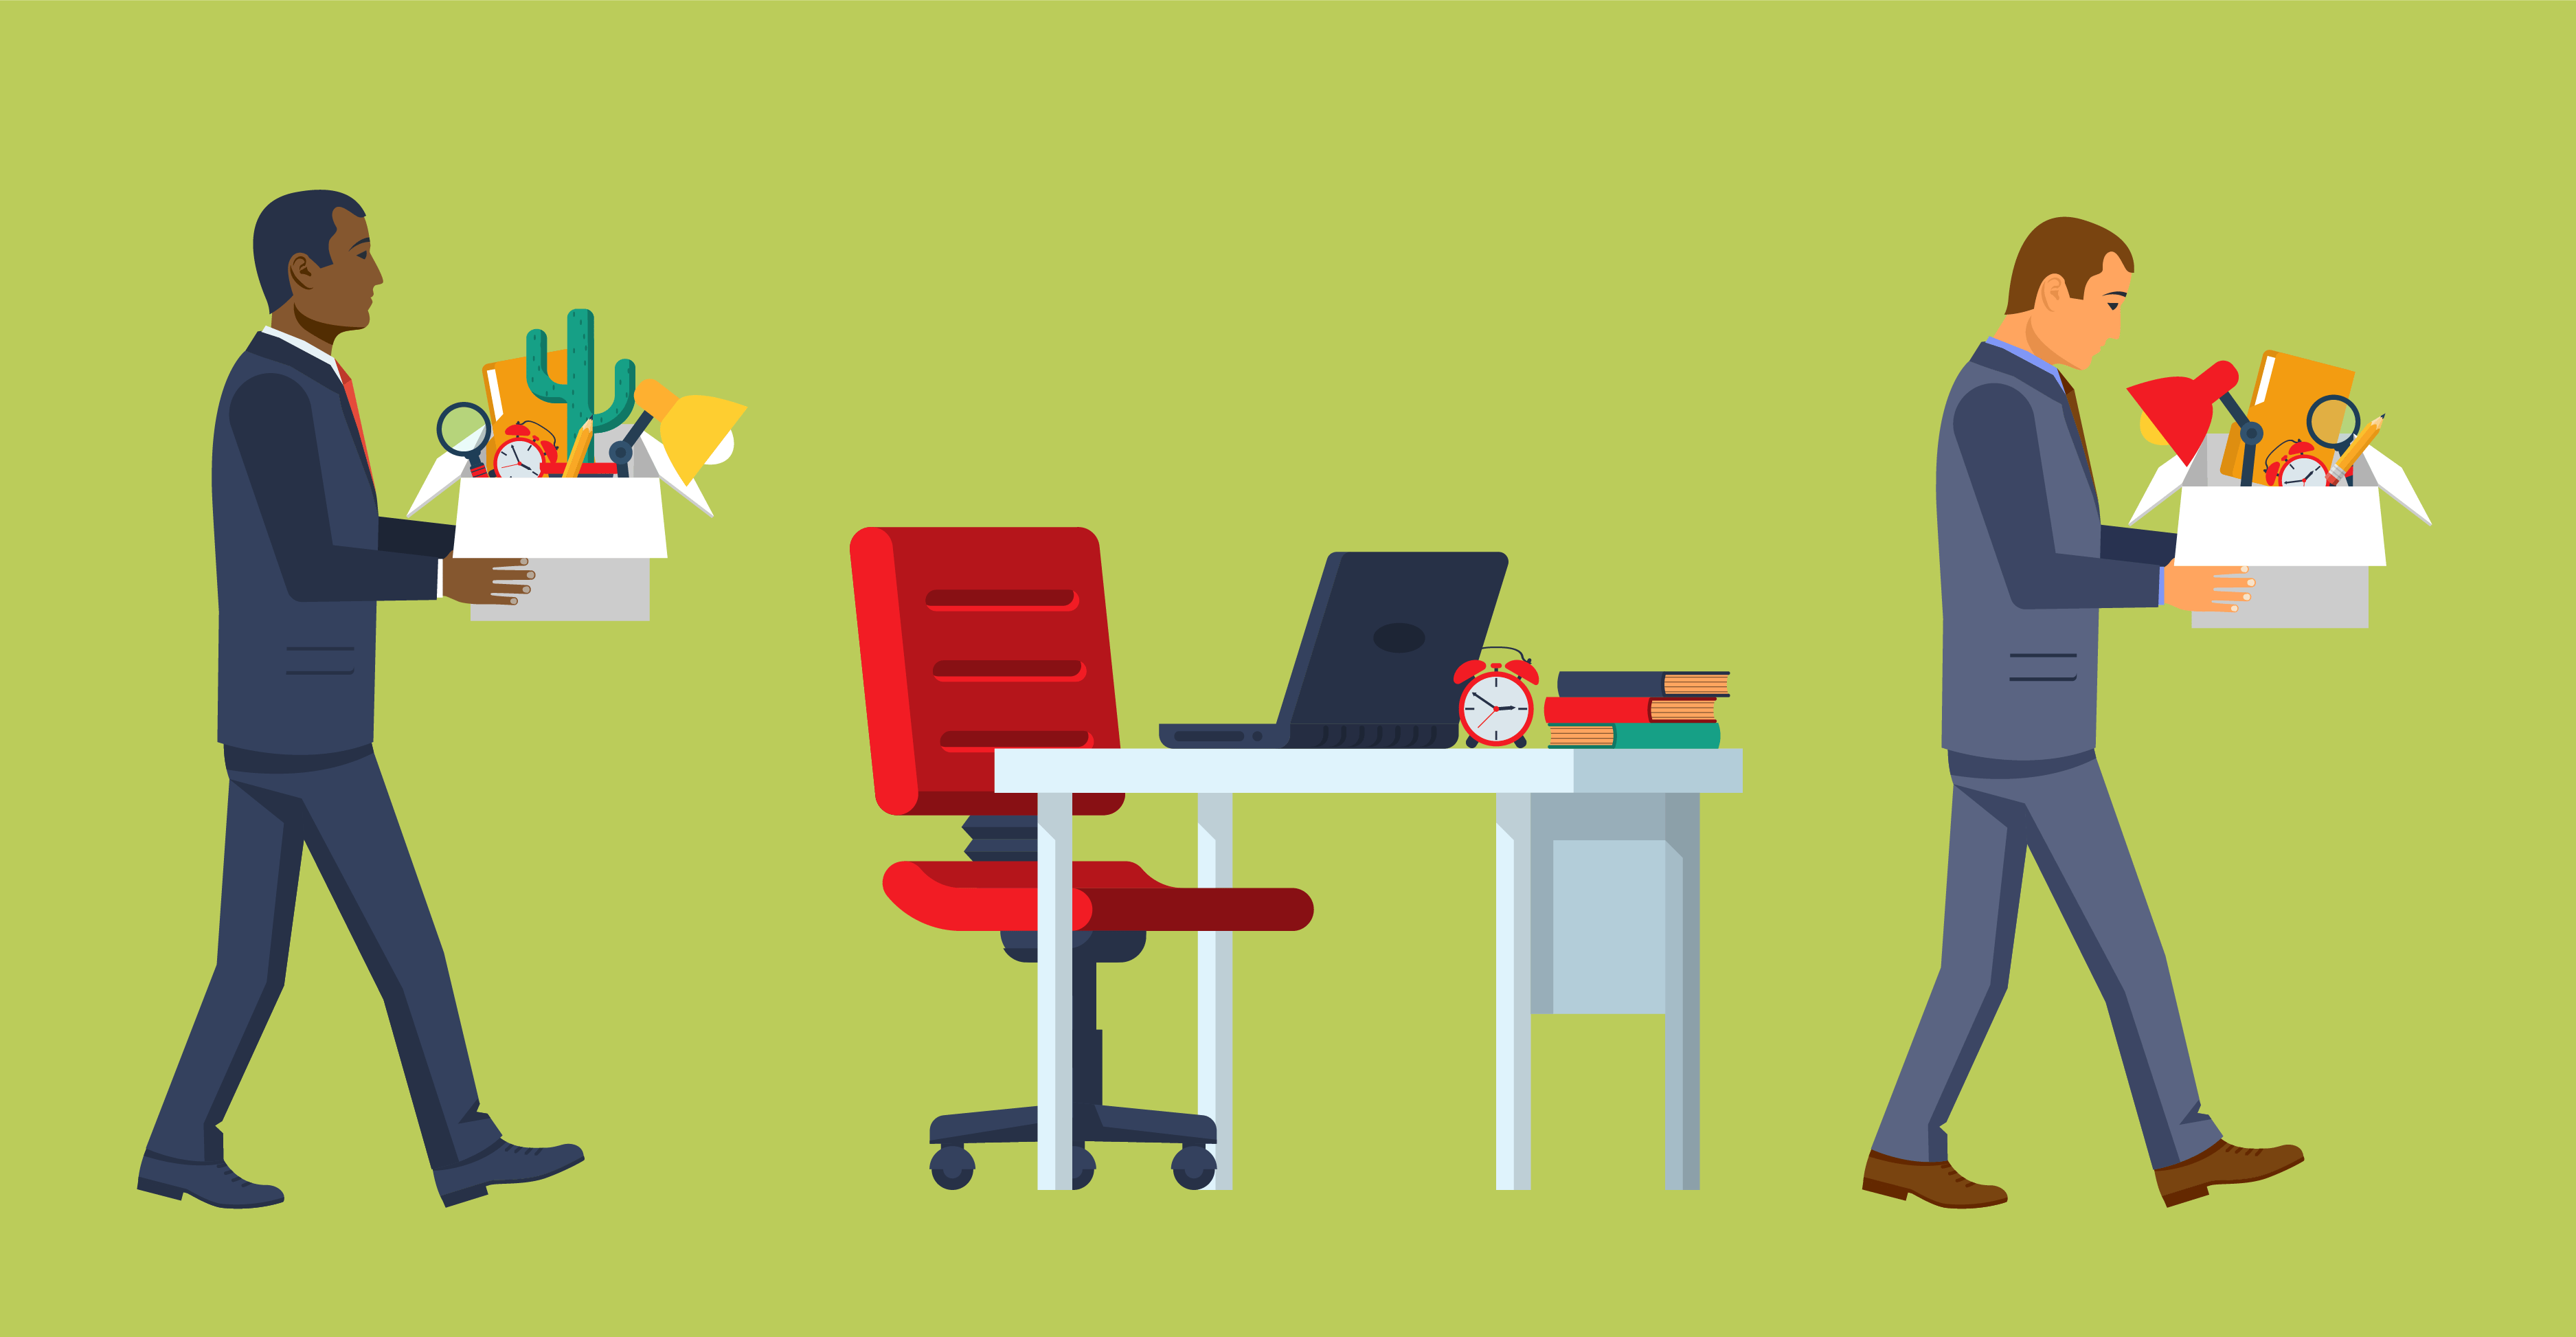

In [155]:
from IPython.display import Image
Image(filename='Attrition.png', width=1000, height=1000)

In the dynamic landscape of modern businesses, the departure of employees, known as attrition, presents both challenges and opportunities for organizations. The reasons behind employee attrition are diverse, ranging from tangible factors like unsatisfactory pay and poor workplace conditions to intangible ones such as personal circumstances like illness, loss, and relocation. Understanding and mitigating attrition is a critical endeavor for companies striving to cultivate a motivated, productive, and cohesive workforce.

In my ambitious undertaking, I delve into the realm of human resources analytics to explore the multifaceted nature of employee attrition. Leveraging the rich and comprehensive IBM data, I embarked on a transformative journey of insight discovery and prediction. My aim is twofold: first, to gain a profound understanding of the underlying factors that contribute to attrition within organizations, and second, to develop a powerful predictive model capable of forecasting attrition patterns with remarkable accuracy.

# **IMPORTING LIBRARIES**

In [4]:
#libraries for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#libraries for feature engineering and modeling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# READING THE DATA

https://www.kaggle.com/code/rohitsahoo/ibm-employee-attrition-analysis-and-prediction/input

#**Reading the data into pandas**

In [86]:
df=pd.read_csv('train.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


**DATA DICTIONARY**

In [87]:
#Education
Education={1:'Below College', 2:'College',  3:'Bachelor', 4:'Master', 5:'Doctor'}
#Environment Satisfaction
EnvironmentSatisfaction={1:'Low', 2:'Medium', 2:'High', 3:'Very High'}
#Job Involvement
JobInvolvement={1:'Low', 2:'Medium', 3: 'High', 4 :'Very High'}
#Job Satisfaction
JobSatisfaction={1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
#Performance Rating
PerformanceRating={1:'Low', 2:'Good', 3: 'Excellent', 4: 'Outstanding'}
#Relationship Satisfaction
RelationshipSatisfaction= {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
#Work LifeBalance
WorkLifeBalance= {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}
#Attrition
Attrition={0:"No", 1: "Yes"}

# **PREPROCESSING**

**DATASET SUMMARY**

In [88]:
print("")
print("Information about our data")
print("")
print(df.info())
print("")
print("Colummns with Null values")
print("")
print(df.isnull().sum()[df.isnull().sum()>0])



Information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 


**Observation**

- The dataframe consists of 34 features with datatypes  either integers or objects.
- Every features has 1058 observations (i.e.there is no sign for null values.).

# 3 EXPLORATORY DATA ANALYSIS 

**3.1. HOW MANY EMPLOYEES ENCOUNTERD ATTRITION IN IBM?**

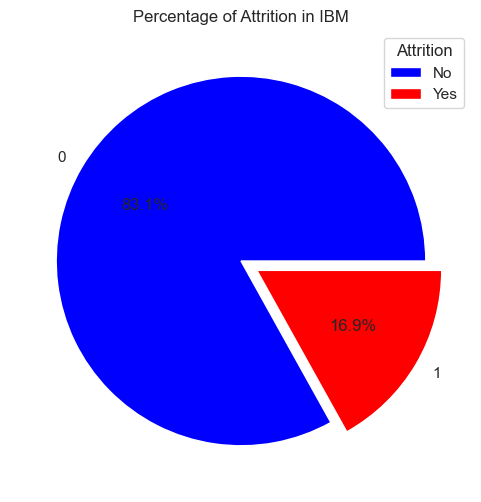

In [150]:
# A dataframe with value counts of Attrition
Attrition = pd.Series(df['Attrition'].value_counts())

# Creating a DataFrame for the pie chart
attrition_df = pd.DataFrame({'Count': Attrition.values}, index=Attrition.index)

# Define the colors and explode for the pie chart
colors = ['blue', 'red']
explode = (0, 0.1)

# plotting pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set_palette(colors)
plt.pie(attrition_df['Count'], labels=attrition_df.index, autopct="%0.1f%%", explode=explode, radius=1)
plt.title("Percentage of Attrition in IBM")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** Out of 1058 employees, 16.9%  of the employees undergo attriton.

**3.2. IS ATTRITION DEPENDENT ON AGE?**

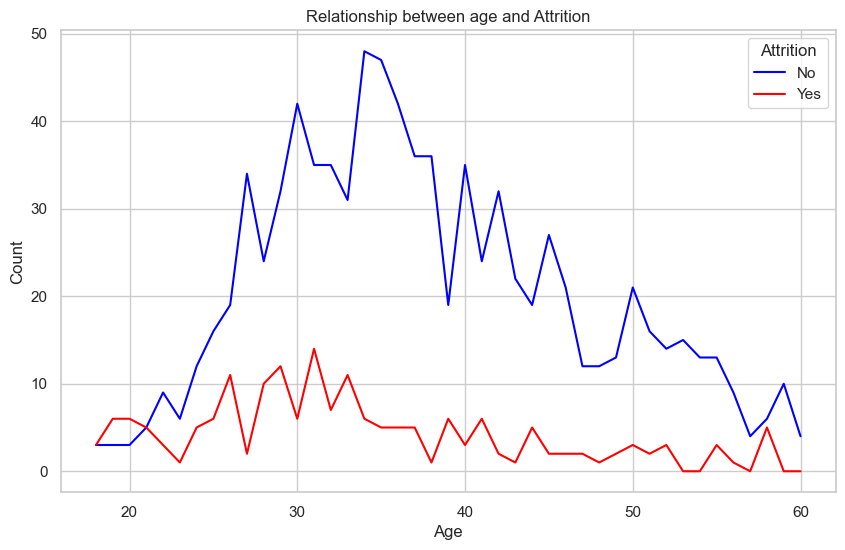

In [112]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['Age'].replace('Age'), columns=df['Attrition'], normalize=False)

# Reseting the index to use 'Age' as a column for plotting
Data = Data.reset_index()

# Creating the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])
sns.lineplot(x='Age', y=0, data=Data, color='blue', label='No')
sns.lineplot(x='Age', y=1, data=Data, color='red', label='Yes')

plt.ylabel('Count')
plt.xlabel('Age')
plt.title("Relationship between age and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation**

- As illustrated on the chart above, attrition Peaks at the age of 31 and  thereafter, it starts dwindling. The attrition rate decreases as the age increases, as people grow older they look for stability 

**3.3. IS ATTRITION DEPENDANT ON JOB LEVEL?**

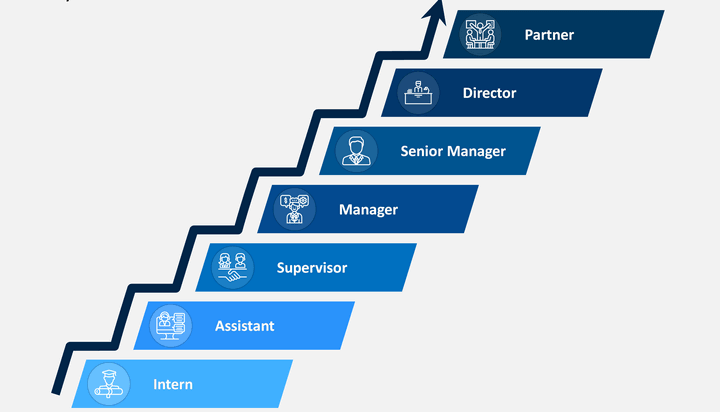

In [181]:
from IPython.display import Image
Image(filename="Level.png", width=1000, height=500)

In [ ]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['JobLevel'].replace('JobLevel'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'JobLevel' as a column for plotting
Data = Data.reset_index()

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])
sns.lineplot(x='JobLevel', y=0, data=Data, color='blue', label='No')
sns.lineplot(x='JobLevel', y=1, data=Data, color='red', label='Yes')

plt.ylabel('Count')
plt.xlabel('Job Level')
plt.title("Relationship between Job Level and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** As Illustrated by the graph above, Employees with low job level are prone to leave the company in search for greener pastures compared to those at a high job level.

**3.4. IS ATTRITION DEPENDENT ON INCOME?**  

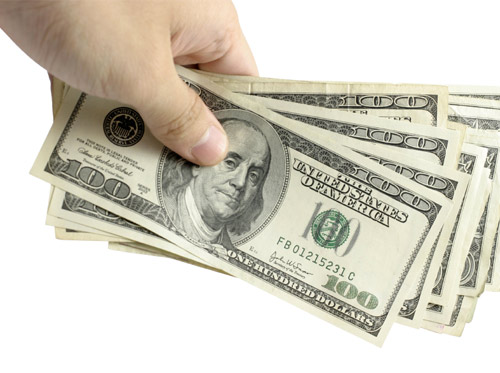

In [182]:
from IPython.display import Image
Image(filename='Income.jpeg', width=500, height=100)

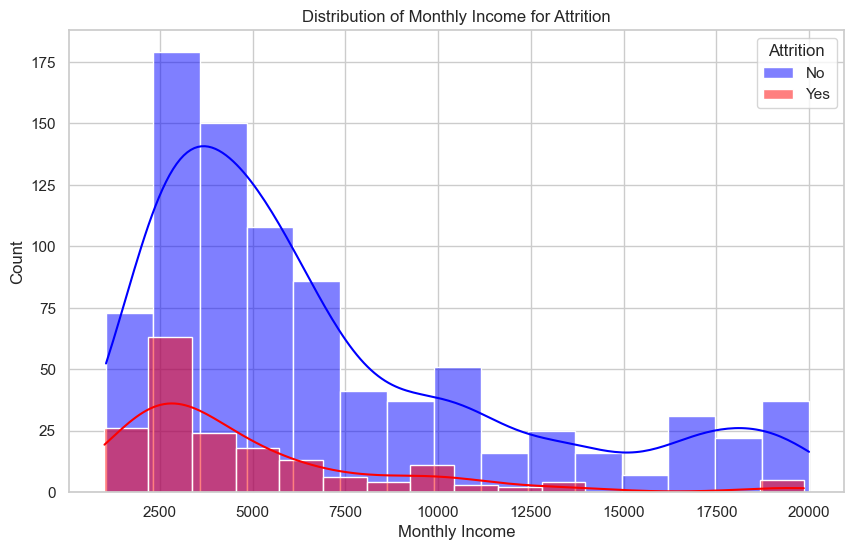

In [142]:
# Assuming you have a DataFrame named 'df'
Yes = df[df["Attrition"] == 1]
No = df[df["Attrition"] == 0]

# Creating histograms using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=No, x="MonthlyIncome", color='blue', alpha=0.5, label='No', kde=True)
sns.histplot(data=Yes, x="MonthlyIncome", color='red', alpha=0.5, label='Yes', kde=True)

# Labeling axis and adding title
plt.xlabel('Monthly Income')
plt.title("Distribution of Monthly Income for Attrition")
plt.legend(loc='upper right', title="Attrition")

plt.show()

**Observation** 

**3.5. Is Attrition dependant on Performance Rating?**

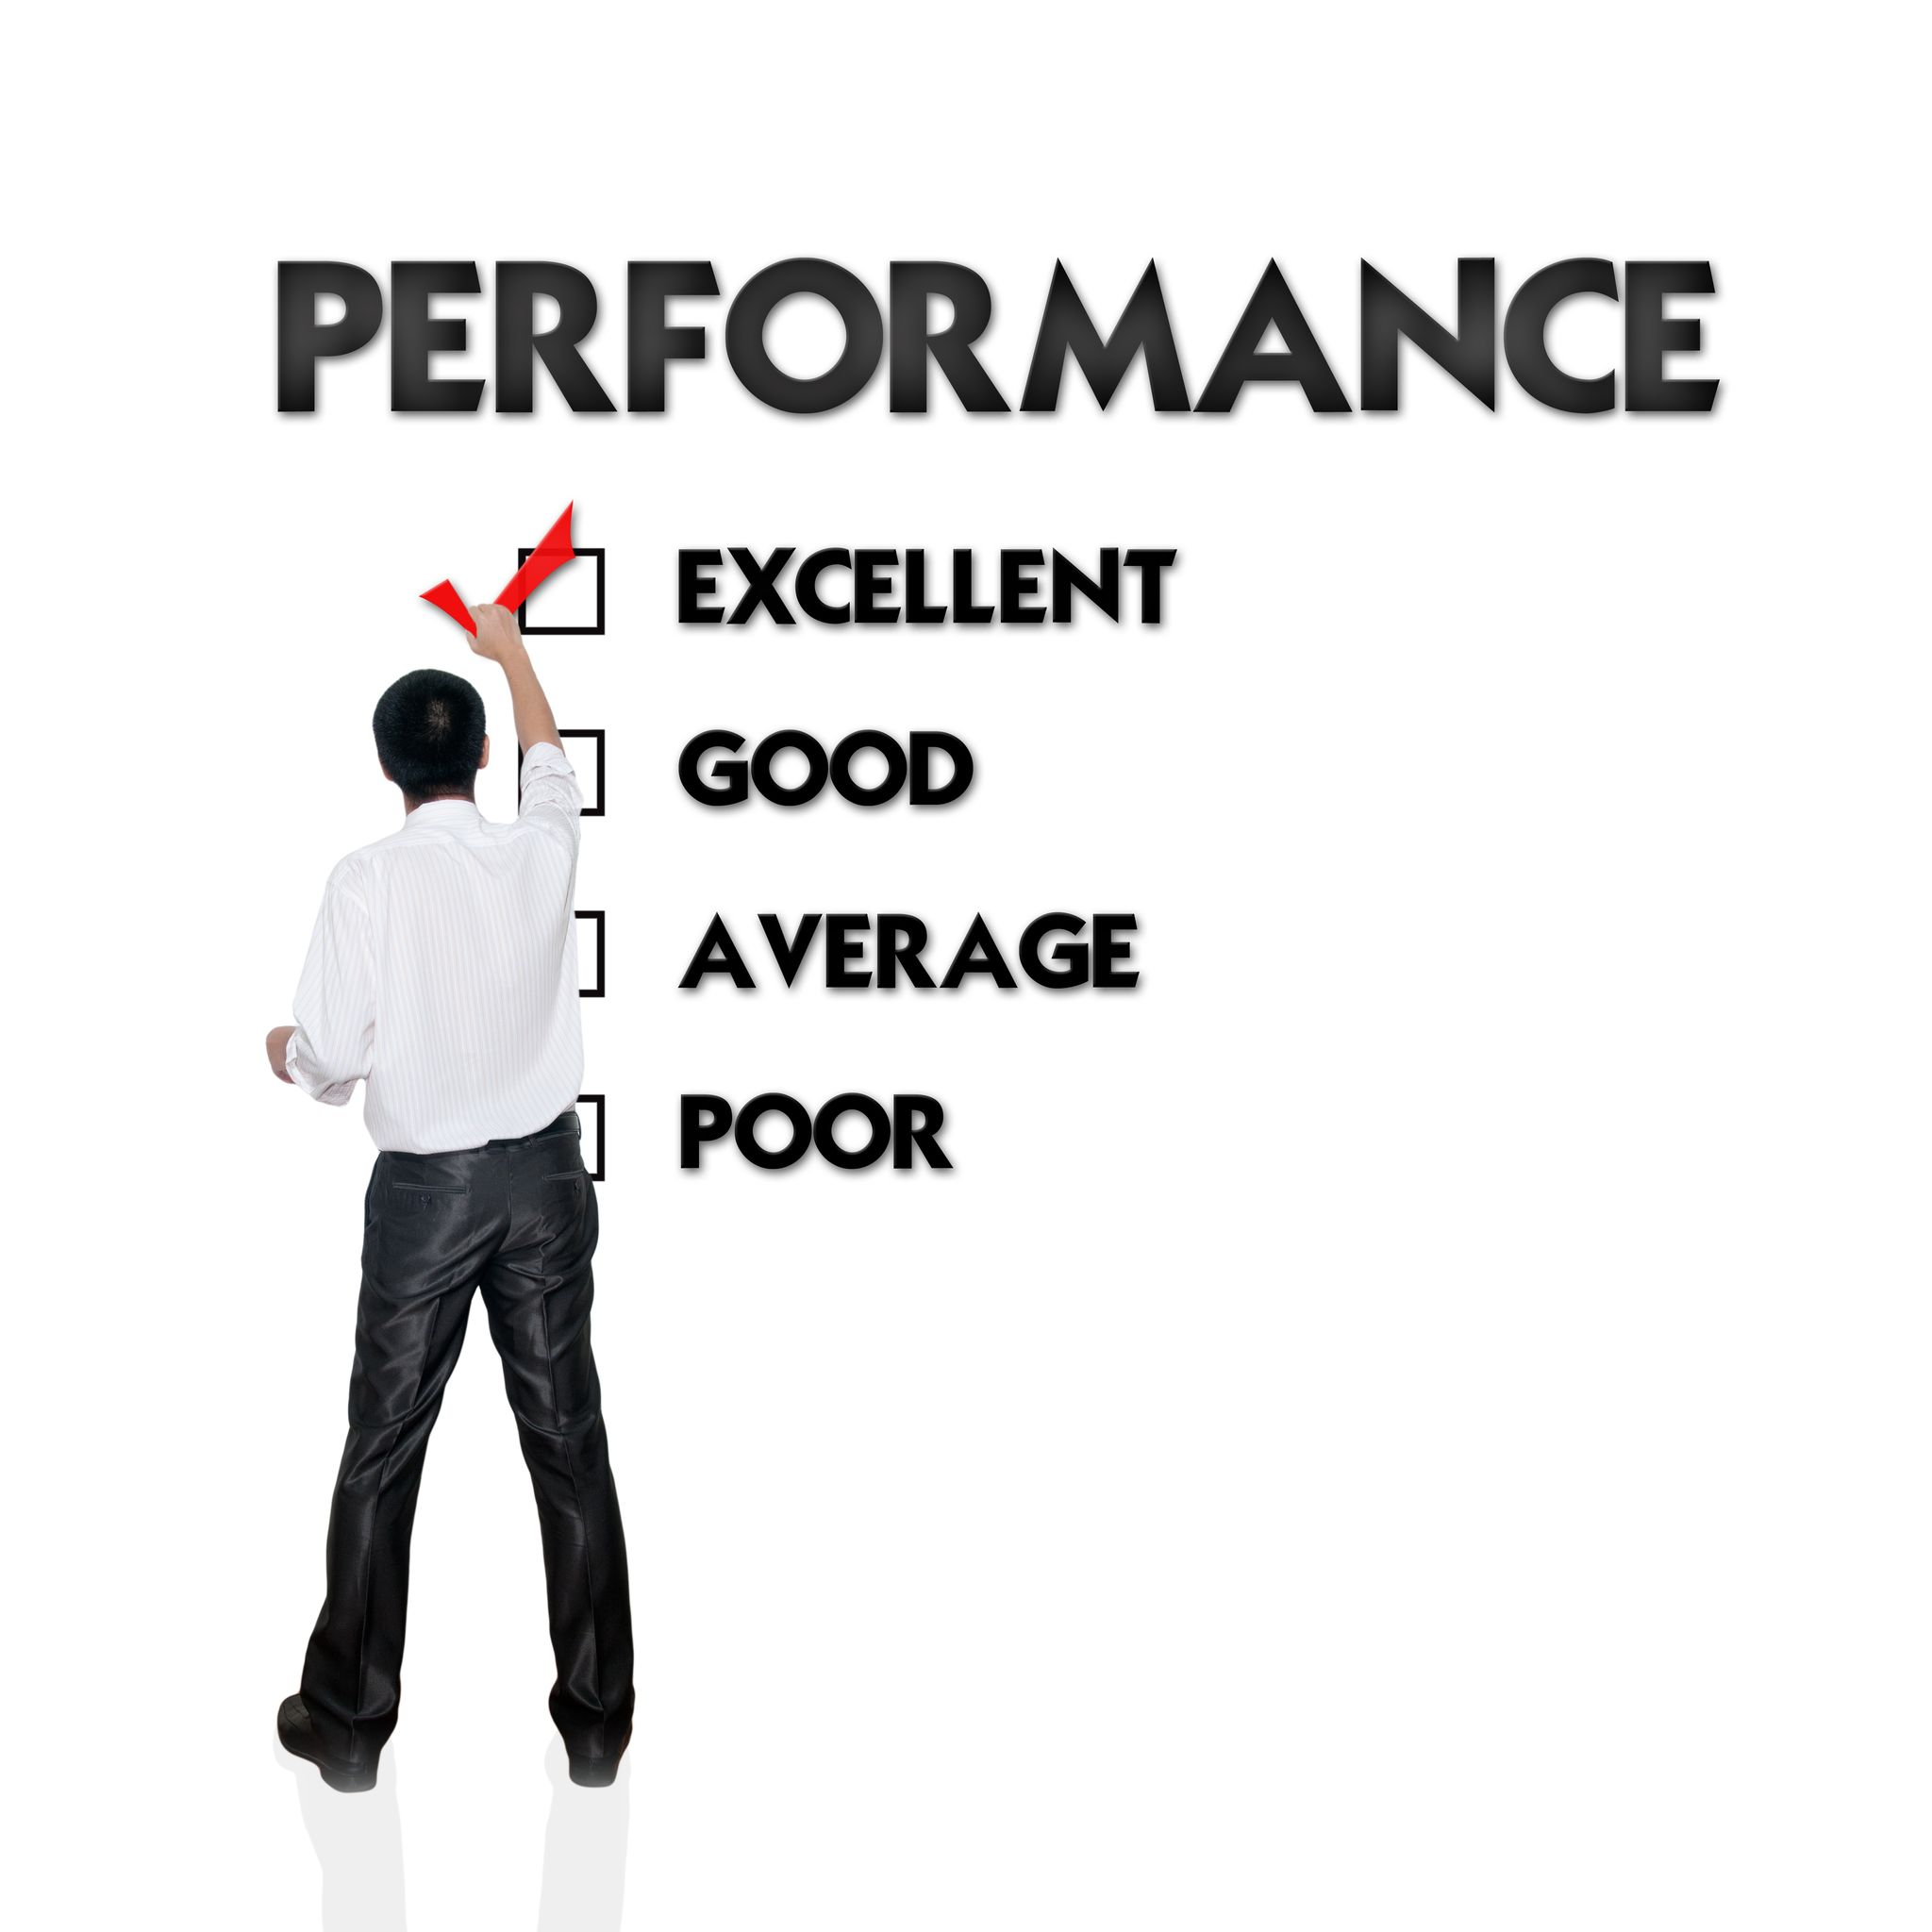

In [152]:
from IPython.display import Image
Image(filename='performance-review.jpg', width=500, height=500)

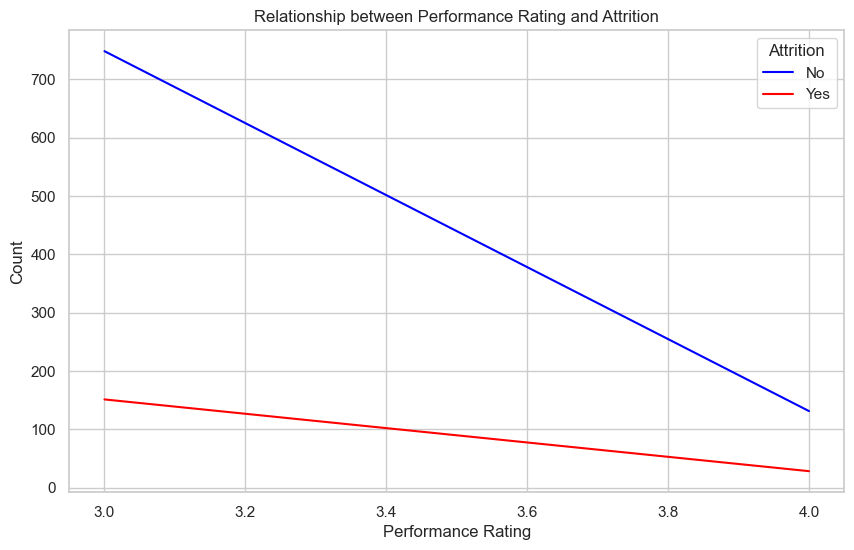

In [145]:

# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['PerformanceRating'].replace('PerformanceRating'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'NumCompaniesWorked' as a column for plotting
Data = Data.reset_index()

# Pivot the data to have 'Yes' and 'No' as separate columns
Data_pivot = Data.pivot_table(index='PerformanceRating', values=[1, 0], fill_value=0)

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.lineplot(data=Data_pivot, x='PerformanceRating', y=0, color='blue', label='No',  ci=None)
sns.lineplot(data=Data_pivot, x='PerformanceRating', y=1, color='red', label='Yes', ci=None)

plt.ylabel('Count')
plt.xlabel('Performance Rating')
plt.title("Relationship between Performance Rating and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation**

-  The data indicates that a significant number of employees have lower performance ratings. This could be due to various reasons, such as insufficient skills, lack of motivation, unclear expectations, or challenging job tasks.
- The data suggests that employees with lower performance ratings are more likely to leave the company compared to those with higher performance ratings. This trend raises the question of why lower-rated employees are more prone to attrition.
-  Employees who receive lower performance ratings might feel dissatisfied with their work or their contributions to the organization.

**3.6. DOES ATTRITION DEPEND ON THE NUMBER OF COMPAMNIES WORKED?**

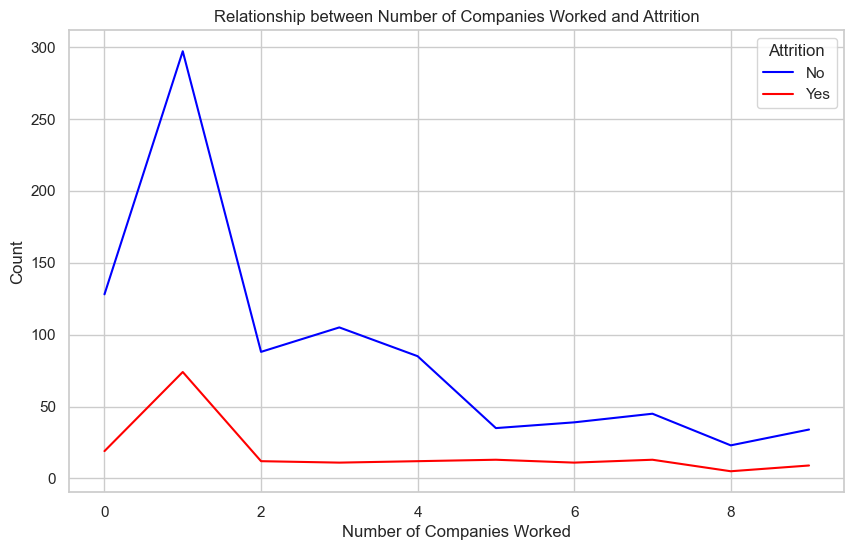

In [141]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['NumCompaniesWorked'].replace('NumCompaniesWorked'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'NumCompaniesWorked' as a column for plotting
Data = Data.reset_index()

# Pivot the data to have 'Yes' and 'No' as separate columns
Data_pivot = Data.pivot_table(index='NumCompaniesWorked', values=[1, 0], fill_value=0)

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.lineplot(data=Data_pivot, x='NumCompaniesWorked', y=0, color='blue', label='No',  ci=None)
sns.lineplot(data=Data_pivot, x='NumCompaniesWorked', y=1, color='red', label='Yes', ci=None)

plt.ylabel('Count')
plt.xlabel('Number of Companies Worked')
plt.title("Relationship between Number of Companies Worked and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** 

- Among employees with limited work experience at multiple companies, the attrition rate is higher. This means that a higher percentage of these employees choose to leave the current organization compared to their counterparts who have worked for more companies.
- Job hopping (frequent changes in employment)are more common among early-career professionals who still want to explore different work environments and industries.

**3.7. Is Attrition dependent on Education Field?**

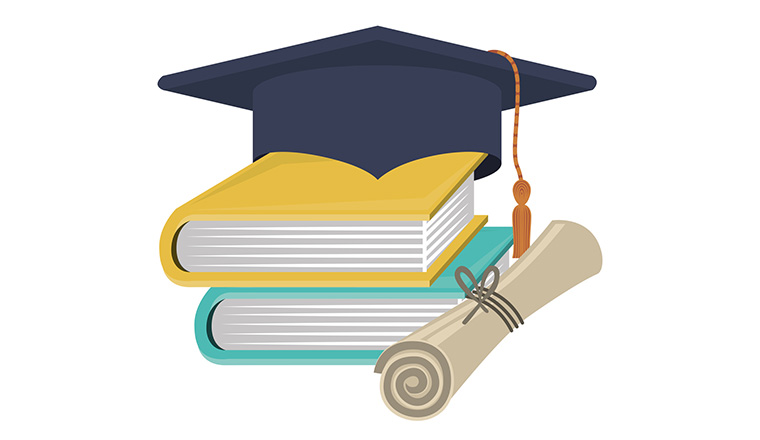

In [164]:
from IPython.display import Image
Image(filename='education.jpg', width=500, height=500)

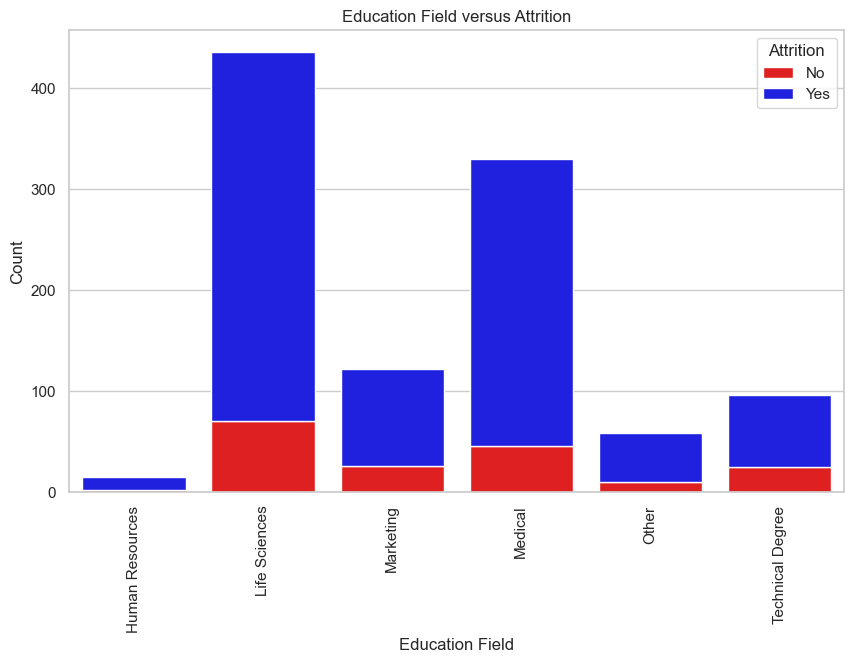

In [158]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['EducationField'].replace('EducationField'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'EducationField' as a column for plotting
Data = Data.reset_index()

# Create the stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.barplot(x='EducationField', y=1, data=Data, color='red', label='Yes',  ci=None)
sns.barplot(x='EducationField', y=0, data=Data, color='blue', label='No', bottom=Data[1],  ci=None)

plt.ylabel('Count')
plt.xlabel('Education Field')
plt.title("Education Field versus Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")
plt.xticks(rotation=90, ha='center')


plt.show()

**3.8. Is Attrition dependent on Job Roles?**

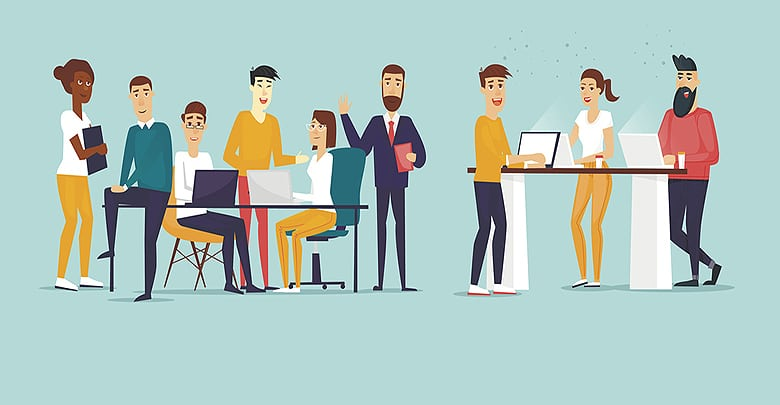

In [172]:
from IPython.display import Image
Image(filename='Roles.png', width=1000, height=100)

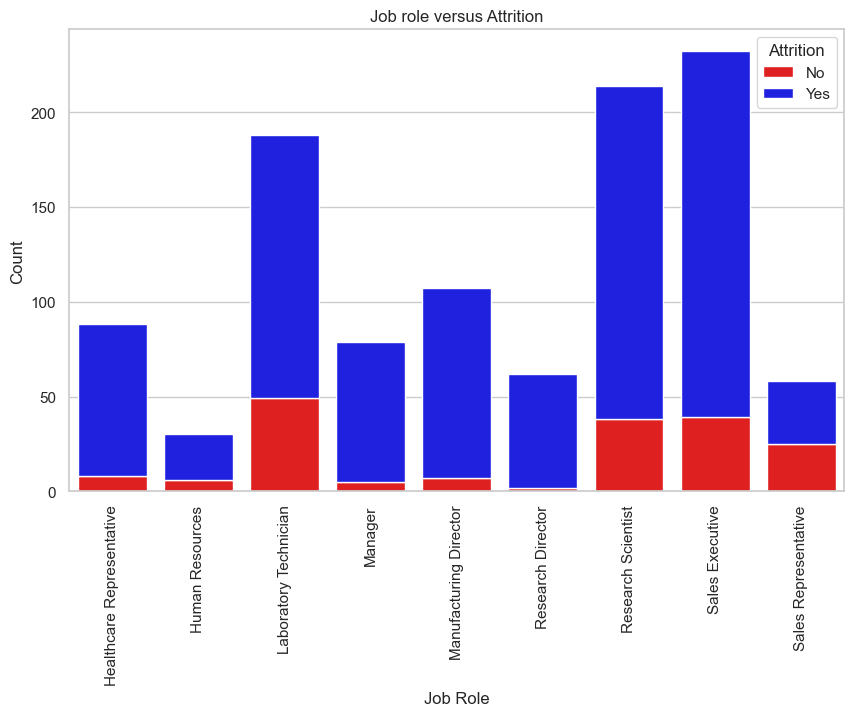

In [166]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['JobRole'].replace('JobRole'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'EducationField' as a column for plotting
Data = Data.reset_index()

# Create the stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.barplot(x='JobRole', y=1, data=Data, color='red', label='Yes',  ci=None)
sns.barplot(x='JobRole', y=0, data=Data, color='blue', label='No', bottom=Data[1],  ci=None)

plt.ylabel('Count')
plt.xlabel('Job Role')
plt.title("Job role versus Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")
plt.xticks(rotation=90, ha='center')


plt.show()

**Observations**

- The data indicates that there are more employees in the job roles of Research Scientists and Sales Executives compared to Laboratory Technicians. However, despite having fewer employees, the Laboratory Technician job role has the highest attrition rate. Laboratory Technicians might perceive limited opportunities for career growth within the organization, which could motivate them to seek advancement elsewhere. It's possible that the compensation and benefits offered to Laboratory Technicians are comparatively lower than those in other job roles, prompting them to explore higher-paying opportunities elsewhere.

- It is essential to note that more than 20 Research Scientists, Sales Executives, and Sales Representatives have faced attrition. 

**3.9. Does working over time affect attrition?**

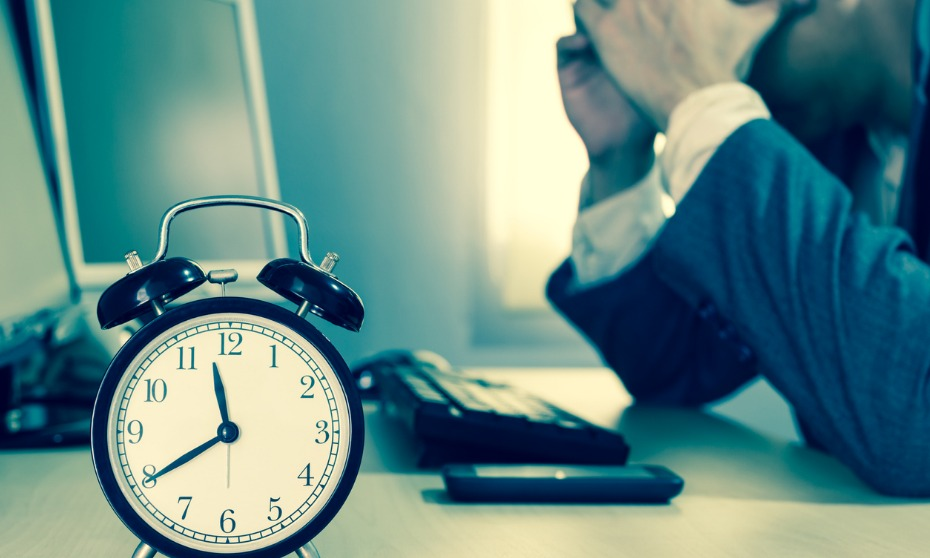

In [162]:
from IPython.display import Image
Image(filename='overtime.jpg', width=1000, height=500)

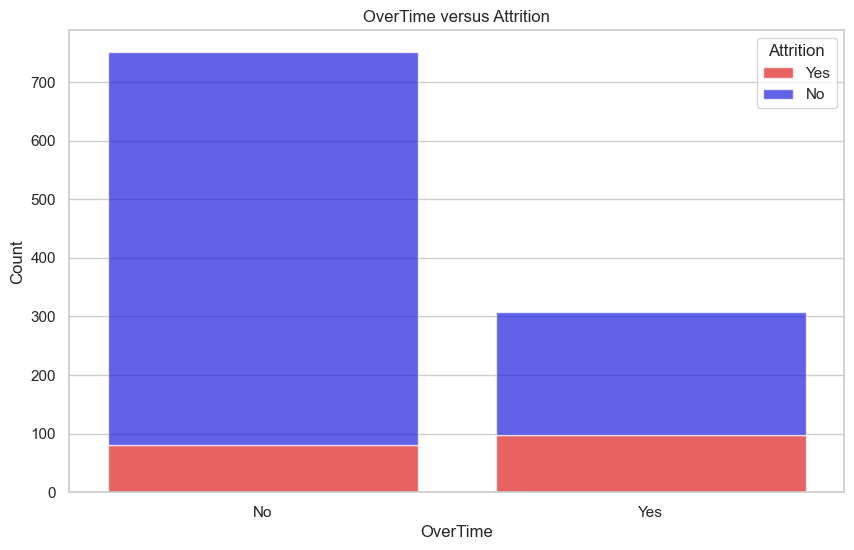

In [149]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['OverTime'].replace('OverTime'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'BusinessTravel' as a column for plotting
Data = Data.reset_index()

# Create the stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.barplot(x='OverTime', y=1, data=Data, color='red', label='Yes', alpha=0.7,  ci=None)
sns.barplot(x='OverTime', y=0, data=Data, color='blue', label='No', alpha=0.7, bottom=Data[1],  ci=None)

plt.ylabel('Count')
plt.xlabel('OverTime')
plt.title("OverTime versus Attrition")
labels = ['Yes', 'No']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** 

- Despite the majority of employees not working overtime, the attrition rate for those who do work overtime is higher than for those who don't. This means that employees who work additional hours beyond their regular schedules are more likely to leave the organization.
- One possible explanation for the higher attrition rate among employees who work a lot of overtime is a poor work-life balance.Employees who consistently work overtime might feel overworked or underappreciated for their efforts.

# **PREPROCESSING**

**CHECKING FOR MULTICOLINEARITY**

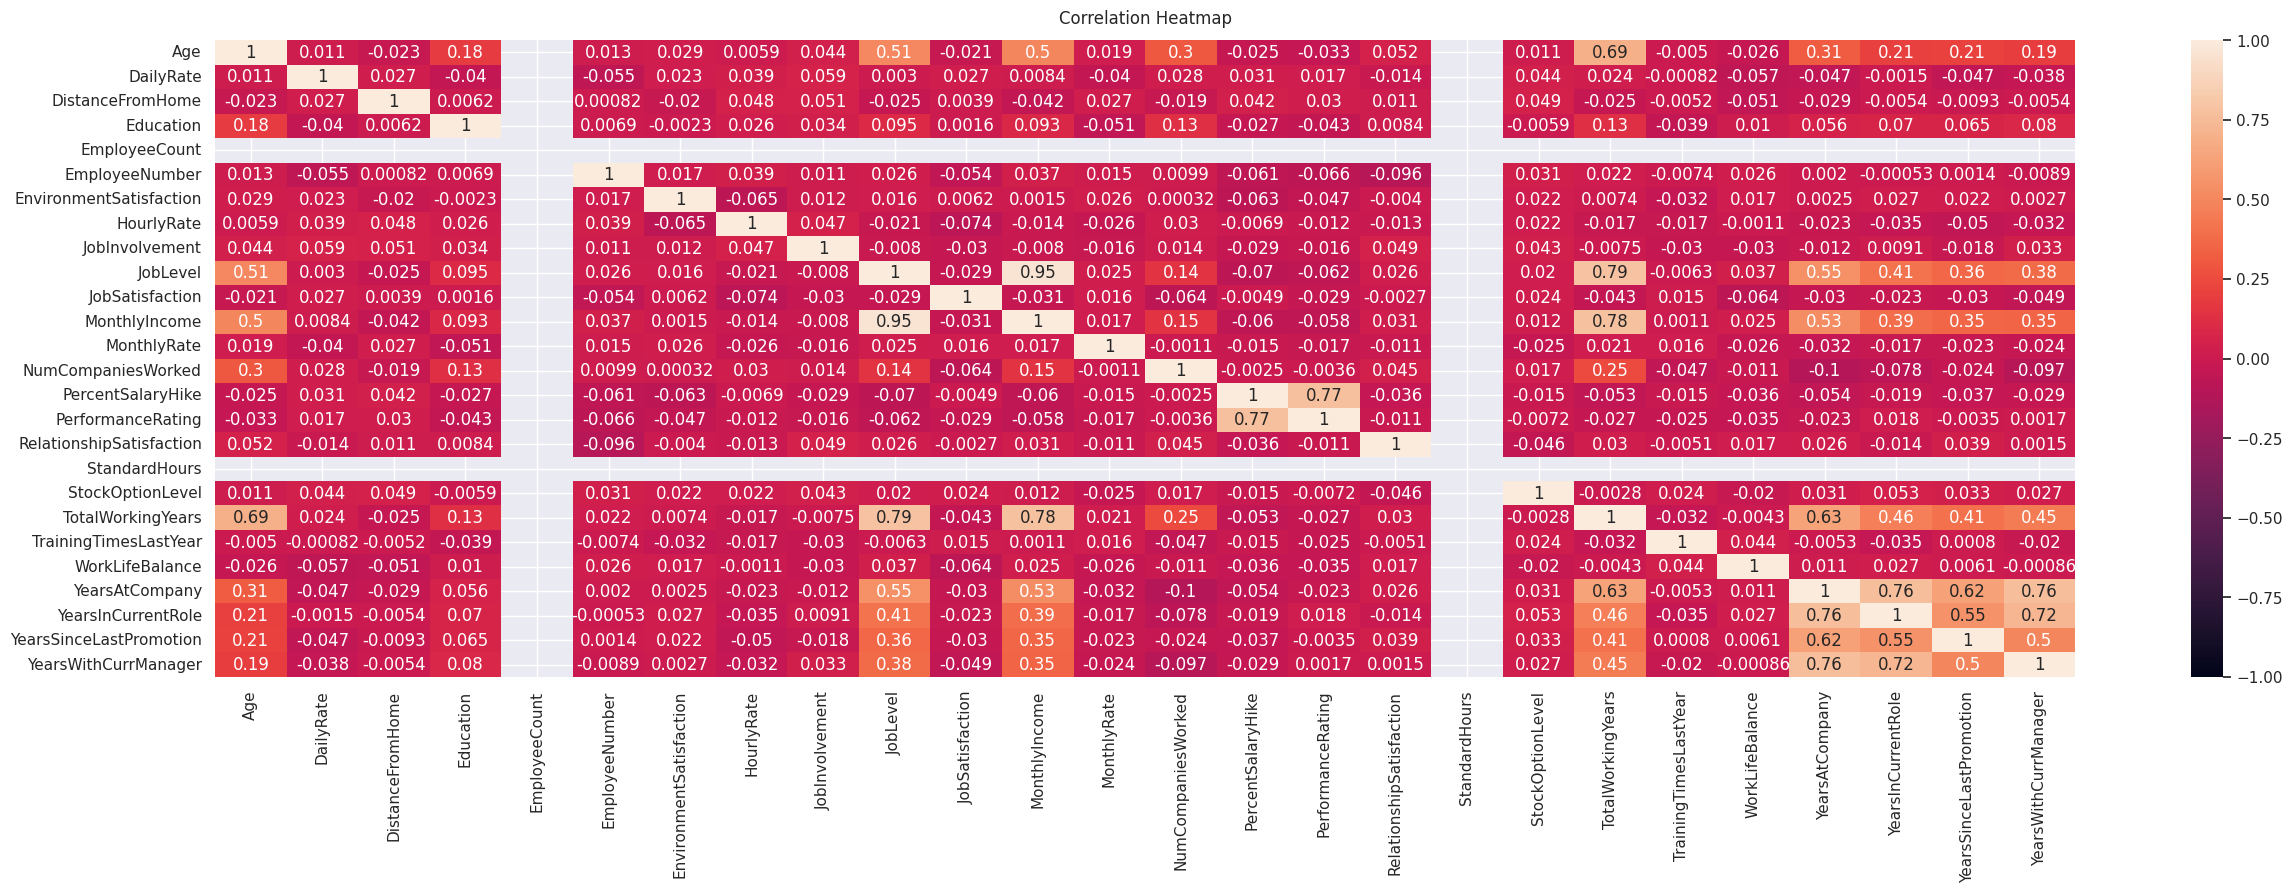

In [99]:
sns.set(rc={'figure.figsize':(30,8.27)})
num=(df.select_dtypes('number'))
heatmap=sns.heatmap(num.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Observation**

1.The correlation between Percent Salary Hike and and Performance Rating is 0.77. However, Performance Rating highly correlates with attrition compared to Percent Salary Hike. Thus, performance rating will be used to build the model. 

2.Job level, total working years and monthly income correlate with each other.However, Total working years greatly correlates with attrition compared to two other features.

3.Years At Company, Years In Current Role and  Years With Current Manager correlates with one another. Either years In Current Role or  Years With Current Manager is going to be used to build a model because their correlation towards attrition are equal and higher than years at company. 



 

**CHECKING FOR LOW AND HIGH CARDINALITY**

**Observation** Employee count, Over18 and Standard Hours has one unique value. Thus, these two features have low cardinality. Each employee has a unique Employee Number, thus resulting in high cardinality. 

**DROPING COLUMNS SHOWING MULTICOLINERITY, LOW AND HIGH CARDINALITY**

In [100]:
drop_columns=['MonthlyIncome','PercentSalaryHike', 'JobLevel', "YearsAtCompany", 'YearsWithCurrManager',"EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]

**SEPERATING THE OUTPUT FROM PREDICTORS**

In [101]:
df.drop(columns = drop_columns, inplace=True)
y=df['Attrition']
df.drop(columns = ['Attrition'], inplace=True)

**ENCODING**

In [102]:
X=pd.get_dummies(df, drop_first=True)

**SPLITING THE DATA**

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42)

# **MODELLING**

**LOGISTIC REGRESSION**

In [104]:
# Model Building
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=(1000)))
# Fitting model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [105]:
#Classification Report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       176
         Yes       0.75      0.42      0.54        36

    accuracy                           0.88       212
   macro avg       0.82      0.69      0.73       212
weighted avg       0.87      0.88      0.86       212



**DECISION TREE CLASSIFIER**

In [106]:
# Model Building
Dmodel = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
# Fitting model to training data
Dmodel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [107]:
#classification report
print(classification_report(y_test, Dmodel.predict(X_test)))

              precision    recall  f1-score   support

          No       0.88      0.84      0.86       176
         Yes       0.35      0.42      0.38        36

    accuracy                           0.77       212
   macro avg       0.61      0.63      0.62       212
weighted avg       0.79      0.77      0.78       212



In [108]:
#Decision Tree Depth
depth = Dmodel.named_steps['decisiontreeclassifier'].get_depth()
depth

14

In [109]:
#Depth with High Accuracy
Dep= range(1, 15)
Accuracy=[]

for i in Dep:
  # Model Building
  dmodel = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=i, random_state=42))
  # Fitting model to training data
  dmodel.fit(X_train, y_train)
  #Accuracy
  Accuracy.append(dmodel.score(X_test, y_test))
Accuracy=pd.Series(Accuracy, index=Dep)
Accuracy.max()

0.8349056603773585

**RANDOM FOREST CLASSIFIER**

In [110]:
#Pipeline
clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

In [111]:
#Params
params = {'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [112]:
#Grid Search
Rmodel = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
Rmodel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [113]:
#Oversampling
OverSampler=RandomOverSampler(random_state=42)
oX_train, oy_train=OverSampler.fit_resample(X_train, y_train)

In [114]:
#Oversampling
Rmodel.fit(oX_train, oy_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [115]:
#best_params
Rparams=Rmodel.best_params_
Rparams


{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 75}

In [116]:
#classification report
print(classification_report(y_test, Rmodel.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       176
         Yes       0.83      0.28      0.42        36

    accuracy                           0.87       212
   macro avg       0.85      0.63      0.67       212
weighted avg       0.86      0.87      0.84       212



**Gradient Boosting Classifier**

In [117]:
#Building a Pipeline
Gclf = make_pipeline(StandardScaler(), GradientBoostingClassifier())

In [118]:
# Params for out GridSerchCV
Gparams = {'gradientboostingclassifier__n_estimators': range(10, 100, 5), 'gradientboostingclassifier__max_depth': range(10, 50, 5)}

In [119]:
#GridSearchCV
Gmodel = GridSearchCV(Gclf, param_grid=Gparams, cv=5, n_jobs=-1, verbose=1)

In [120]:
#Model Training
Gmodel.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 50, 5),
                         'gradientboostingclassifier__n_estimators': range(10, 100, 5)},
             verbose=1)

In [121]:
Gparams=Gmodel.best_params_
Gparams

{'gradientboostingclassifier__max_depth': 10,
 'gradientboostingclassifier__n_estimators': 10}

In [122]:
#classification report
print(classification_report(y_test, Gmodel.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       176
         Yes       0.38      0.39      0.38        36

    accuracy                           0.79       212
   macro avg       0.63      0.63      0.63       212
weighted avg       0.79      0.79      0.79       212



**Best model**

The best model is Logistic regression followed by Random Forest Regression. Logistic regression has an accuracy of 88% percent.

**FUNCTION FOR PROCESSING DATA AND PREDICTING ATTRITION**

In [123]:
def attrition_prediction(path):
  
  #Load data into a dataframe
  df=pd.read_csv(path)

  #Copy of the dataframe
  DF=df.copy()

  #Drop the columns not used for the model
  drop_columns=['MonthlyIncome','PercentSalaryHike', 'JobLevel', "YearsAtCompany", 'YearsWithCurrManager',"EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]
  df.drop(columns=drop_columns, inplace=True)

  #Encoding 
  X=pd.get_dummies(df, drop_first=True)

  #Predict attrition
  DF['Attrition']= model.predict(X)

  return DF


**DATAFRAME WITH THE PREDICTED ATTRITION**

In [129]:
attrition_prediction('/content/test.csv')


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,80,0,16,2,4,15,9,10,10,Yes
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,80,1,1,3,3,1,0,0,0,No
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,80,0,4,2,2,0,0,0,0,Yes
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,80,1,1,2,3,1,0,0,0,No
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,80,0,16,2,2,2,2,2,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
408,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
409,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
410,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No
